<a href="https://colab.research.google.com/github/VANITANEHE/CREDIT-CARD-FRAUD-DETECTION/blob/main/creditcardfrauddetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**📜 Project Overview**

Credit card fraud is a big problem for banks. This project uses machine learning to find and stop fraud by studying past transaction data. The aim is to catch fraud accurately without wrongly flagging real transactions.











**📊 Dataset Description**

The dataset has 100,000 fake (simulated) credit card transactions to look like real ones. Each transaction includes:

* **TransactionID**: A unique number for each transaction.

* **TransactionDate**: When the transaction happened.

* **Amount**: How much money was spent.

* **MerchantID**: The store or seller involved.

* **TransactionType**: Whether it was a purchase or refund.

* **Location**: Where the transaction took place.

* **IsFraud**: Shows if it was fraud (1) or not (0). This is what the model tries to predict.















**1. 🔄 Data Loading & Import**

In this step, we get the dataset ready to use by:

**Importing Libraries:**

* **Pandas** for handling data tables.

* **NumPy** for working with numbers.

**Actions Taken:**

Load the dataset from a file (like CSV).

Look at the first few rows to understand the data.

Check data types to see if they are correct for analysis.















In [78]:
import pandas as pd         # For data manipulation and analysis
import numpy as np          # For numerical computations

from sklearn.preprocessing import StandardScaler, LabelEncoder  # For data preprocessing

import matplotlib.pyplot as plt   # For plotting graphs
import seaborn as sns             # For advanced visualizations

from sklearn.model_selection import train_test_split  # For splitting data into train/test


In [79]:
file_path = "credit_card_fraud_dataset.csv"
data = pd.read_csv(file_path)  # Load CSV into a DataFrame


In [80]:
data.head()

,TransactionID,TransactionDate,Amount,MerchantID,TransactionType,Location,IsFraud
0,1,2024-04-03 14:15:35.462794,4189.27,688,refund,San Antonio,0
1,2,2024-03-19 13:20:35.462824,2659.71,109,refund,Dallas,0
2,3,2024-01-08 10:08:35.462834,784.00,394,purchase,New York,0
3,4,2024-04-13 23:50:35.462850,3514.40,944,purchase,Philadelphia,0
4,5,2024-07-12 18:51:35.462858,369.07,475,purchase,Phoenix,0


In [81]:
data.info()  # Overview of column data types and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   TransactionID    100000 non-null  int64  
 1   TransactionDate  100000 non-null  object 
 2   Amount           100000 non-null  float64
 3   MerchantID       100000 non-null  int64  
 4   TransactionType  100000 non-null  object 
 5   Location         100000 non-null  object 
 6   IsFraud          100000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 5.3+ MB


In [82]:
data.isnull().sum()  # Check for missing values in each column

,0
TransactionID,0
TransactionDate,0
Amount,0
MerchantID,0
TransactionType,0
Location,0
IsFraud,0


In [83]:
data.describe()  # Summary statistics for numerical columns

,TransactionID,Amount,MerchantID,IsFraud
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.010000
std,28867.657797,1442.415999,288.715868,0.099499
min,1.000000,1.050000,1.000000,0.000000
25%,25000.750000,1247.955000,252.000000,0.000000
50%,50000.500000,2496.500000,503.000000,0.000000
75%,75000.250000,3743.592500,753.000000,0.000000
max,100000.000000,4999.770000,1000.000000,1.000000


**2. 🧹 Data Cleaning & Preprocessing**

This step improves the quality of the data so our model can learn better.

**Actions Taken:**

* Fix or remove missing values and unusual data (outliers).

* Delete any duplicate rows in the data.

* Change text-based (categorical) data into numbers using techniques like label encoding or one-hot encoding.











In [84]:
data = data.drop_duplicates()  # Remove any duplicate rows

In [85]:
# Label encoding for categorical variables
label_encoder_type = LabelEncoder()
label_encoder_location = LabelEncoder()

In [86]:
# Convert 'TransactionType' and 'Location' to numeric labels
data['TransactionType'] = label_encoder_type.fit_transform(data['TransactionType'])
data['Location'] = label_encoder_location.fit_transform(data['Location'])

In [87]:
# Save mappings for reverse lookup later
transaction_type_mapping = dict(zip(label_encoder_type.classes_, range(len(label_encoder_type.classes_))))
location_mapping = dict(zip(label_encoder_location.classes_, range(len(label_encoder_location.classes_))))
transaction_type_inverse_mapping = {v: k for k, v in transaction_type_mapping.items()}
location_inverse_mapping = {v: k for k, v in location_mapping.items()}

In [88]:
# Convert 'TransactionDate' to datetime object
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])

In [89]:
# Extract time-based features
data['TransactionHour'] = data['TransactionDate'].dt.hour
data['TransactionDay'] = data['TransactionDate'].dt.day
data['TransactionMonth'] = data['TransactionDate'].dt.month

In [90]:
# Drop original timestamp column as it's now decomposed
data = data.drop(columns=['TransactionDate'])

In [91]:
# Check preprocessed data
data.head()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
0,1,4189.27,688,1,7,0,14,3,4
1,2,2659.71,109,1,1,0,13,19,3
2,3,784.00,394,0,4,0,10,8,1
3,4,3514.40,944,0,5,0,23,13,4
4,5,369.07,475,0,6,0,18,12,7


**3. 🔍 Exploratory Data Analysis (EDA)**

This step helps us understand the data better before building the model.

**Actions Taken:**

* Create charts and graphs to see how each feature is spread out.

* Check if the number of fraud and legit transactions is balanced or not.

* Look for relationships between features.

* Find and study outliers, especially for transaction amounts, to spot unusual patterns.











In [92]:
data.describe()

,TransactionID,Amount,MerchantID,TransactionType,Location,IsFraud,TransactionHour,TransactionDay,TransactionMonth
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000
mean,50000.500000,2497.092666,501.676070,0.501310,4.485300,0.010000,11.50084,15.782220,6.516240
std,28867.657797,1442.415999,288.715868,0.500001,2.876283,0.099499,6.91768,8.813795,3.448248
min,1.000000,1.050000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000
25%,25000.750000,1247.955000,252.000000,0.000000,2.000000,0.000000,6.00000,8.000000,4.000000
50%,50000.500000,2496.500000,503.000000,1.000000,4.000000,0.000000,12.00000,16.000000,7.000000
75%,75000.250000,3743.592500,753.000000,1.000000,7.000000,0.000000,17.00000,23.000000,10.000000
max,100000.000000,4999.770000,1000.000000,1.000000,9.000000,1.000000,23.00000,31.000000,12.000000


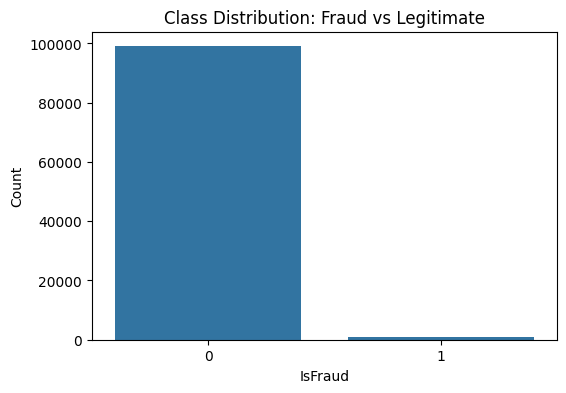

In [93]:
plt.figure(figsize=(6, 4))
sns.countplot(x='IsFraud', data=data)
plt.title('Class Distribution: Fraud vs Legitimate')
plt.xlabel('IsFraud')
plt.ylabel('Count')
plt.show()

**📊 Class Distribution Insight**

The plot shows that out of 100,000 transactions, 99,000 are non-fraud and only 1,000 are fraud. This means fraudulent cases are very rare. Such class imbalance can be a challenge for model training, as the model may become biased toward predicting non-fraud cases.



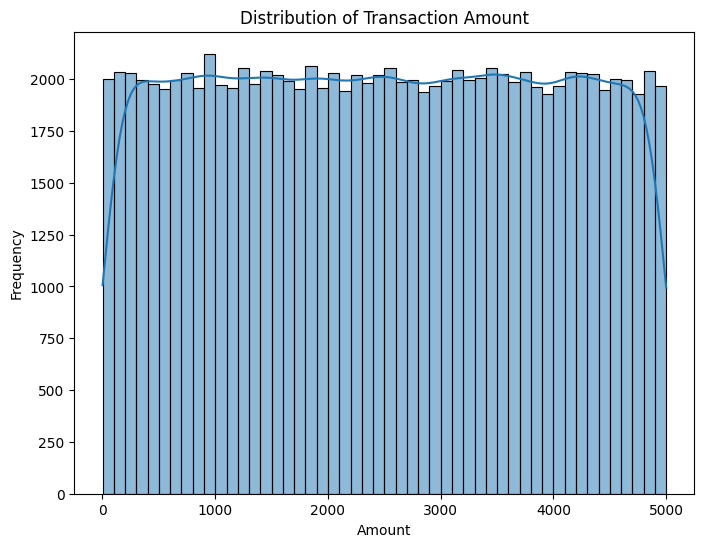

In [63]:
plt.figure(figsize=(8, 6))
sns.histplot(data['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

**💰 Transaction Amount Distribution**

The plot shows that transaction amounts are fairly evenly distributed, with most transactions grouped in ranges of up to 2000 units. This helps in understanding spending behavior and detecting unusual amounts that may indicate fraud.



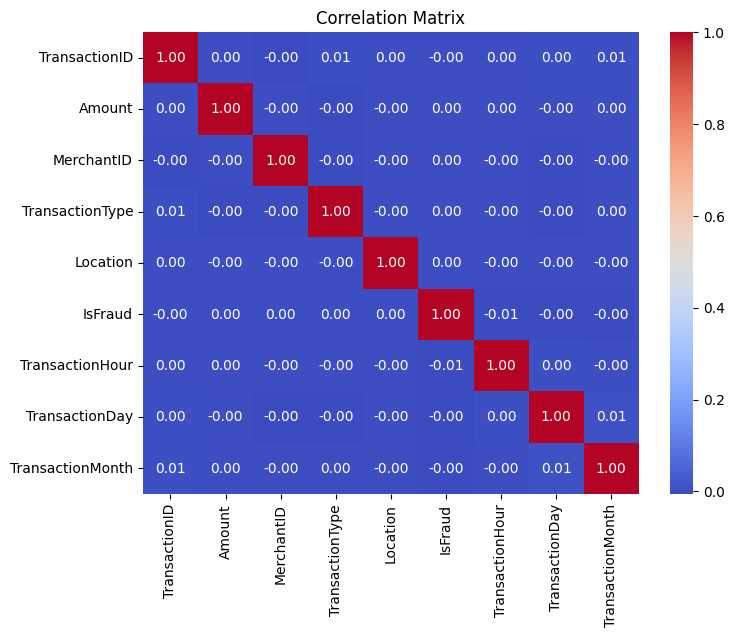

In [94]:
correlation = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


**📊 Correlation Analysis**

The correlation plot indicates that there are no strong or clear correlations among the features. This could pose a challenge during modeling, as it suggests limited linear relationships between variables.



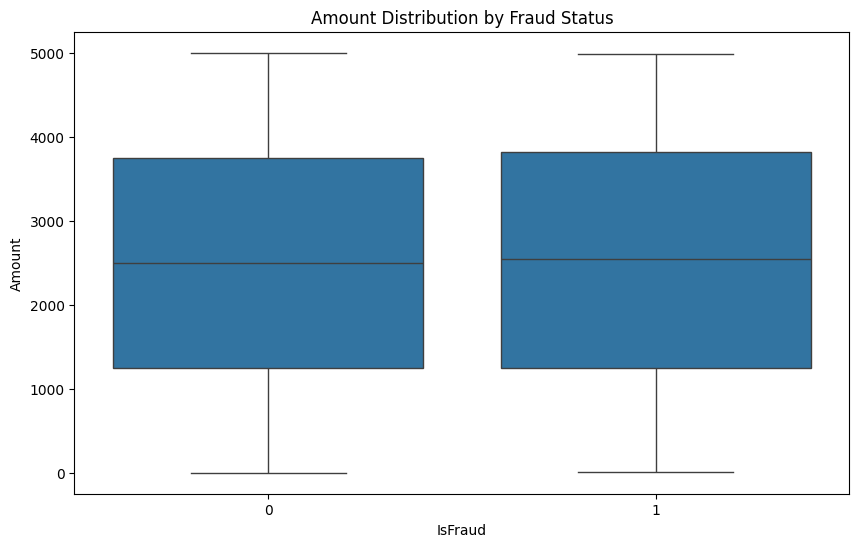

In [95]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='IsFraud', y='Amount', data=data)
plt.title('Amount Distribution by Fraud Status')
plt.xlabel('IsFraud')
plt.ylabel('Amount')
plt.show()

**📦 Box Plot: Transaction Amounts by Fraud Status**

The box plot compares transaction amounts between fraudulent and non-fraudulent transactions. It shows how the amounts are spread out in each group:

* **Medians** help us compare the typical transaction value.

* **Boxes** show the middle range (IQR) of values.

* **Whiskers** show the full range (excluding outliers).

* **Outliers** highlight unusually high or low transactions, which could be important for detecting fraud.



However, the box plot shows that the **maximum**, **minimum**, and **median** **transaction amounts are very similar for both fraud and non-fraud cases**. This means fraud can happen at any transaction amount, making it harder to detect based on amount alone.



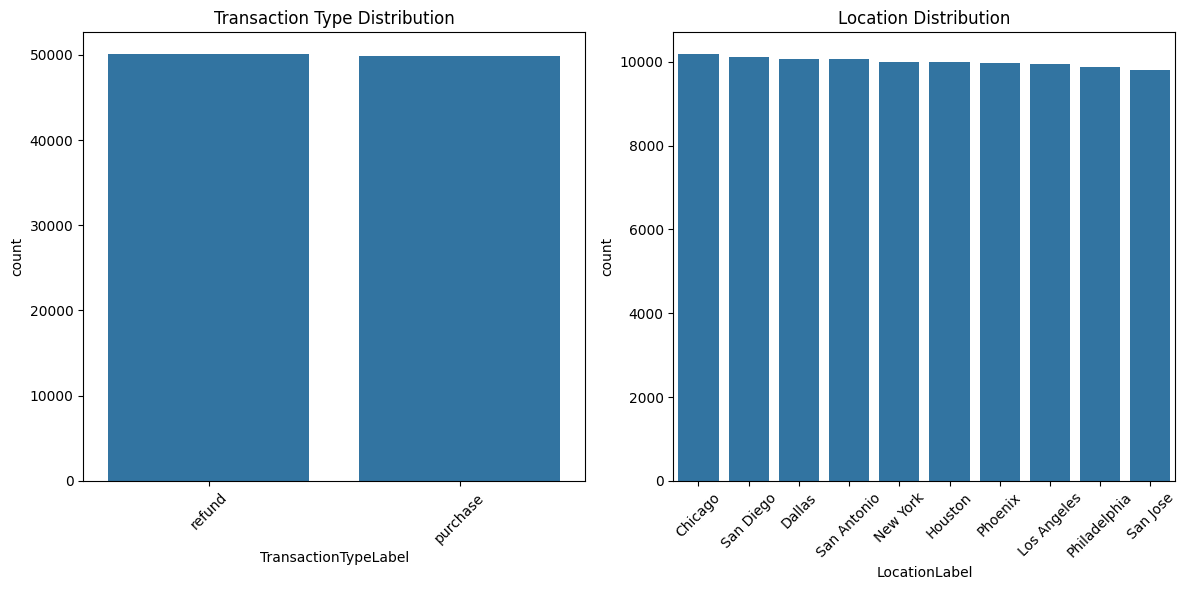

In [96]:
data['TransactionTypeLabel'] = data['TransactionType'].map(transaction_type_inverse_mapping)
data['LocationLabel'] = data['Location'].map(location_inverse_mapping)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='TransactionTypeLabel', data=data, order=data['TransactionTypeLabel'].value_counts().index)
plt.title('Transaction Type Distribution')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.countplot(x='LocationLabel', data=data, order=data['LocationLabel'].value_counts().index)
plt.title('Location Distribution')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-97-8f0b452c3b54>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, palette='viridis')
<ipython-input-97-8f0b452c3b54>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, palette='coolwarm')


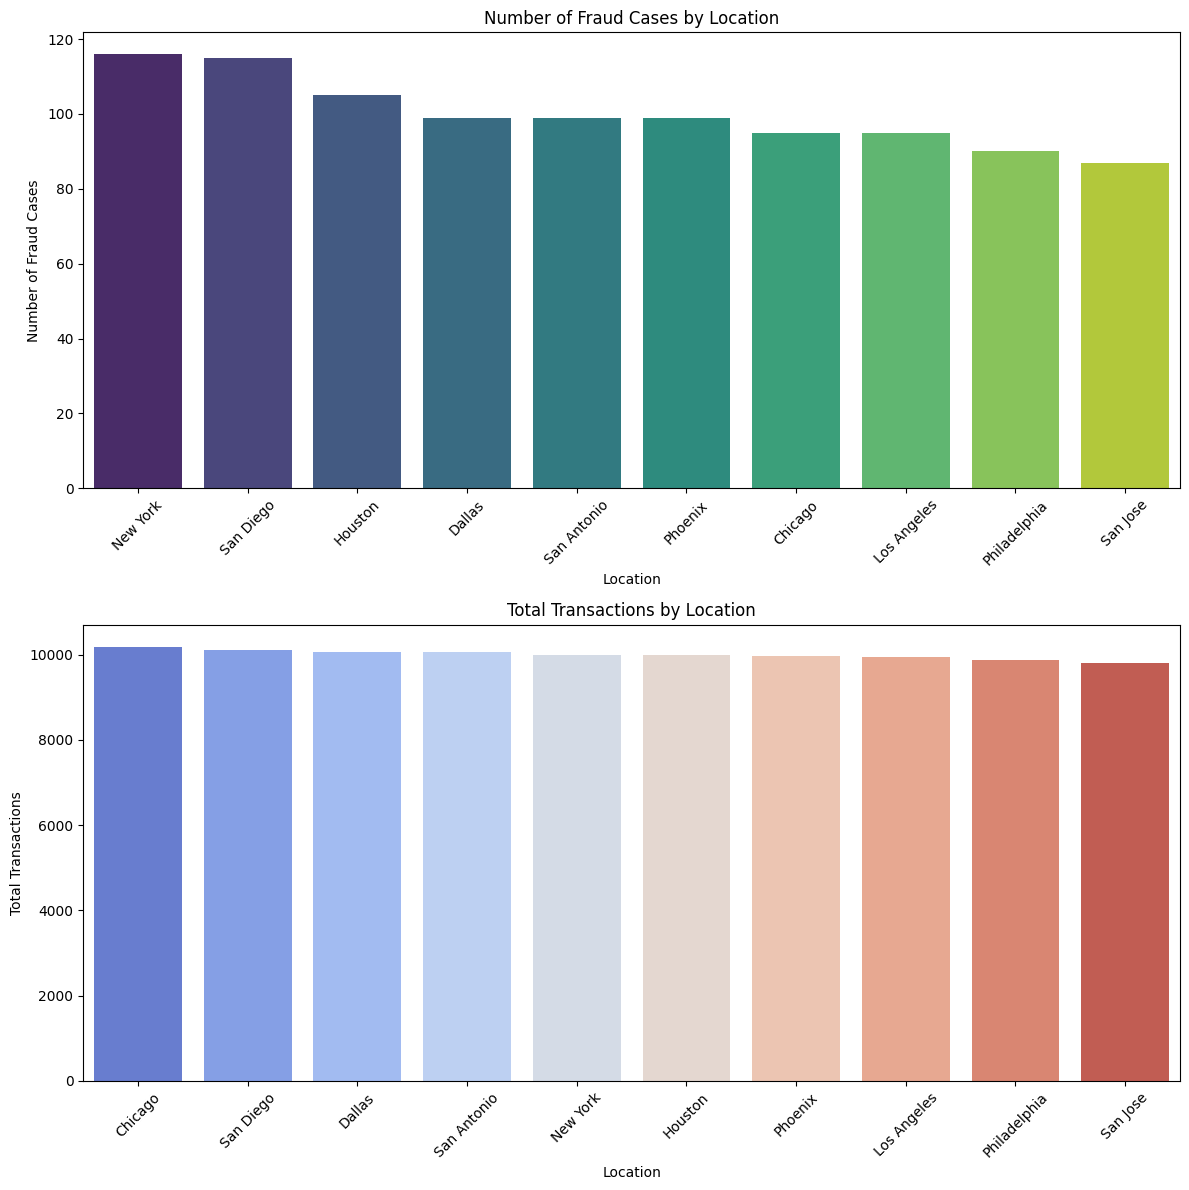

In [97]:
plt.figure(figsize=(12, 12))

plt.subplot(2, 1, 1)

fraud_by_location = data[data['IsFraud'] == 1].groupby('LocationLabel').size().reset_index(name='FraudCount')

fraud_by_location = fraud_by_location.sort_values(by='FraudCount', ascending=False)

# Create the barplot for fraud cases
sns.barplot(x='LocationLabel', y='FraudCount', data=fraud_by_location, palette='viridis')
plt.title('Number of Fraud Cases by Location')
plt.xlabel('Location')
plt.ylabel('Number of Fraud Cases')
plt.xticks(rotation=45)

plt.subplot(2, 1, 2)

total_transactions_by_location = data.groupby('LocationLabel').size().reset_index(name='TotalTransactions')

total_transactions_by_location = total_transactions_by_location.sort_values(by='TotalTransactions', ascending=False)

sns.barplot(x='LocationLabel', y='TotalTransactions', data=total_transactions_by_location, palette='coolwarm')
plt.title('Total Transactions by Location')
plt.xlabel('Location')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<Axes: xlabel='Amount', ylabel='TransactionHour'>

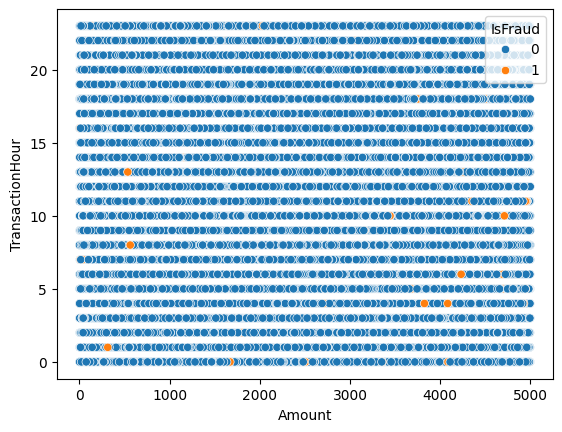

In [98]:
sns.scatterplot(x='Amount', y='TransactionHour', hue='IsFraud', data=data)

The scatterplot shows that fraud can happen at any hour and with different transaction amounts. However, we can see a pattern where **lower amounts tend to occur around hours 1, 7, and 13**, while other times usually involve larger amounts.



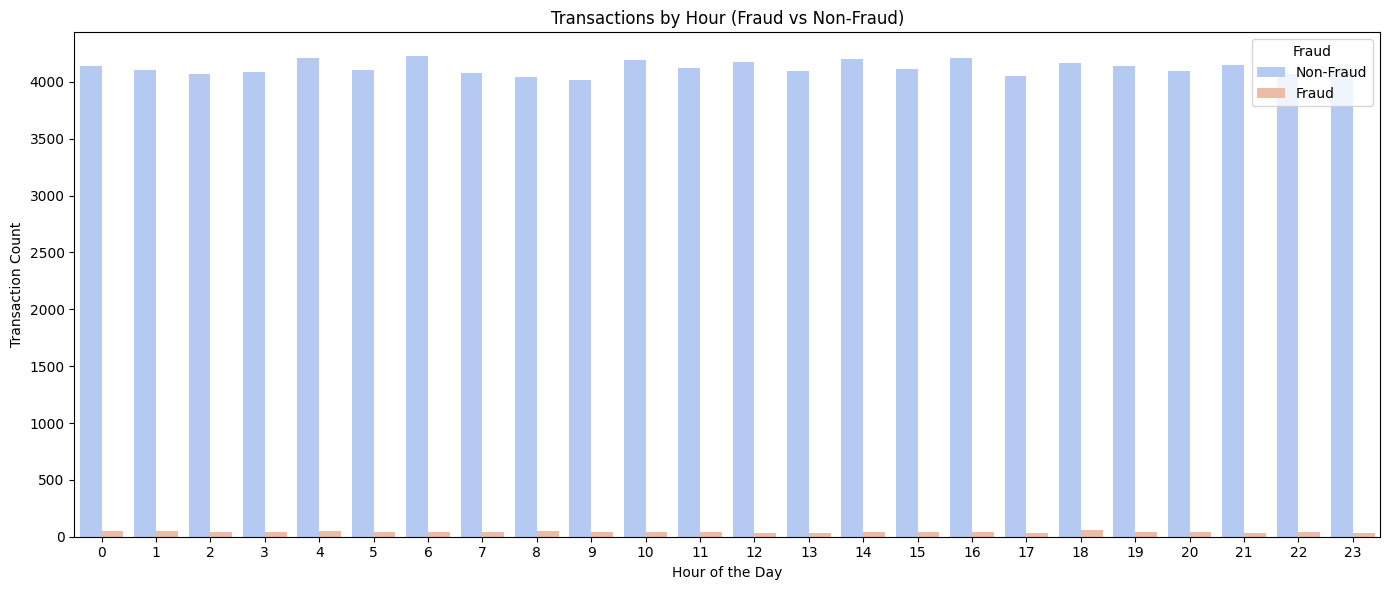

In [99]:
plt.figure(figsize=(14, 6))

sns.countplot(x='TransactionHour', hue='IsFraud', data=data, palette='coolwarm')
plt.title('Transactions by Hour (Fraud vs Non-Fraud)')
plt.xlabel('Hour of the Day')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.tight_layout()
plt.show()

<ipython-input-100-4f6b52f4f5ce>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='IsFraud', y='Amount', data=data, palette='muted')


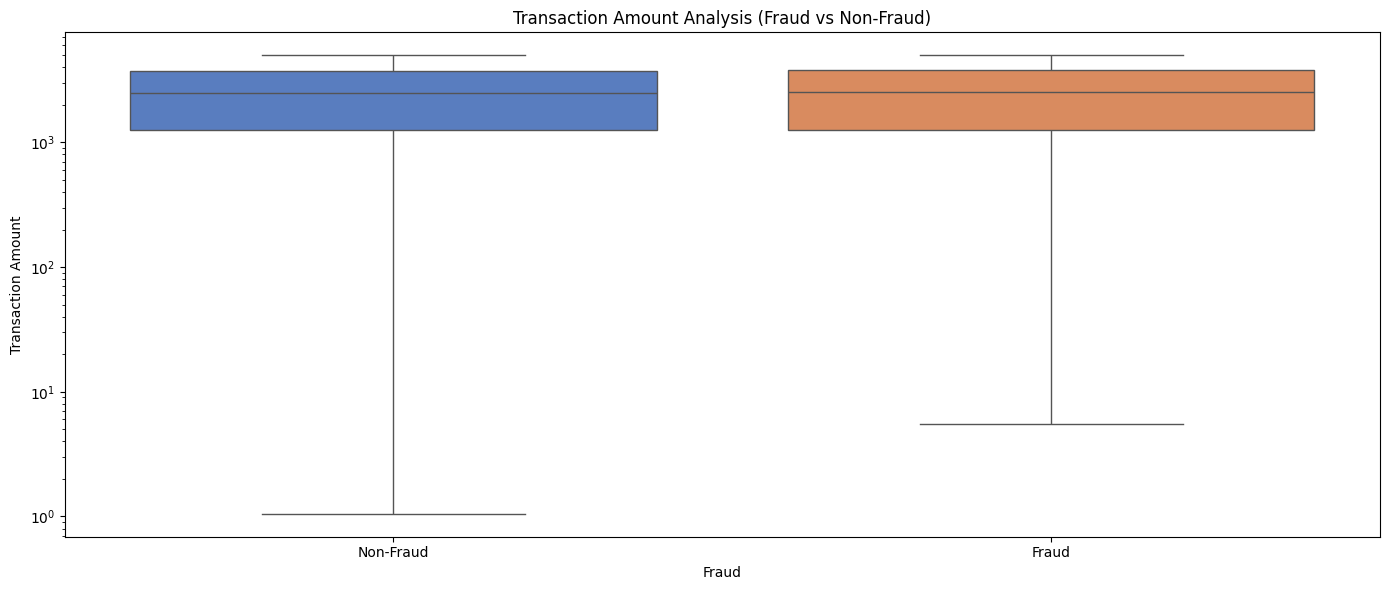

In [100]:
plt.figure(figsize=(14, 6))

sns.boxplot(x='IsFraud', y='Amount', data=data, palette='muted')
plt.title('Transaction Amount Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Fraud')
plt.ylabel('Transaction Amount')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.yscale('log')
plt.tight_layout()
plt.show()

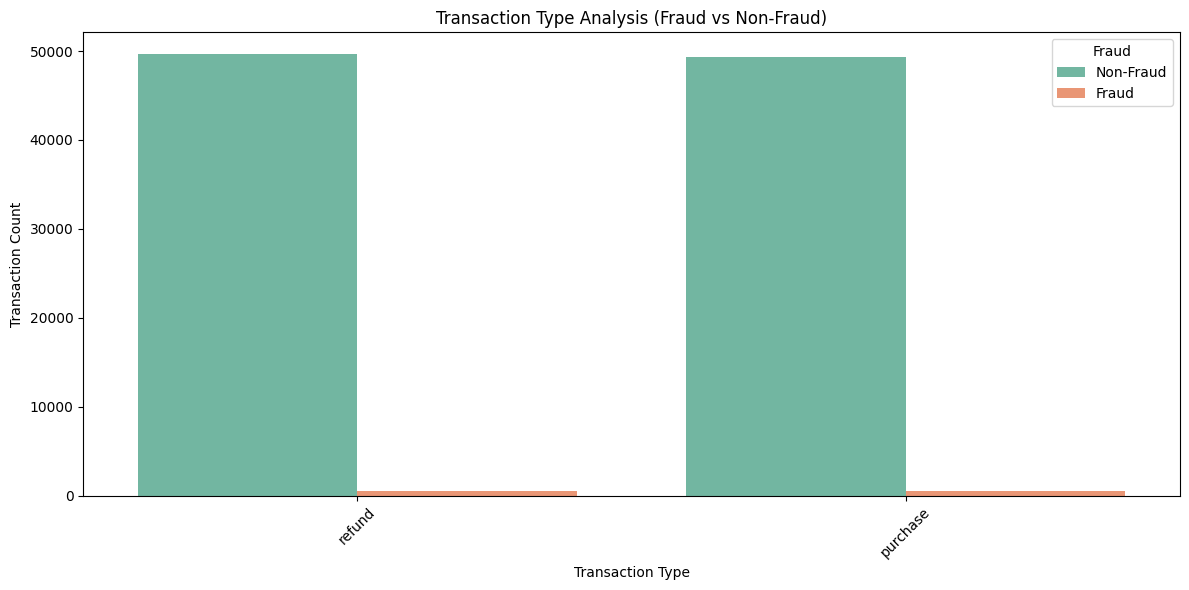

In [101]:
plt.figure(figsize=(12, 6))

sns.countplot(x='TransactionTypeLabel', hue='IsFraud', data=data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud vs Non-Fraud)')
plt.xlabel('Transaction Type')
plt.ylabel('Transaction Count')
plt.legend(title='Fraud', loc='upper right', labels=['Non-Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-103-94a04abfd6b2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TransactionTypeLabel', data=fraud_data, palette='Set2')


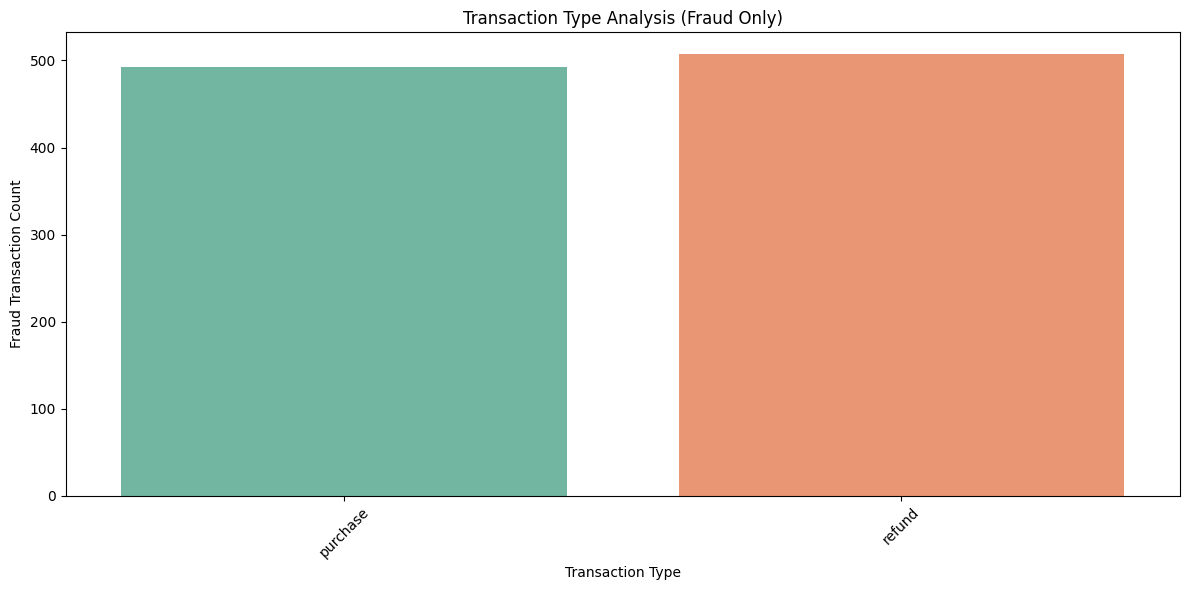

In [103]:
plt.figure(figsize=(12, 6))

fraud_data = data[data['IsFraud'] == 1]

sns.countplot(x='TransactionTypeLabel', data=fraud_data, palette='Set2')
plt.title('Transaction Type Analysis (Fraud Only)')
plt.xlabel('Transaction Type')
plt.ylabel('Fraud Transaction Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.tight_layout()
plt.show()

The biggest challenge with this dataset is to **detect fraud patterns despite the data being highly imbalanced**, since fraudulent transactions are very rare compared to legitimate ones.



**4. 🔬 Model Building**

In this step, we train different machine learning models to detect fraud. We will try several algorithms and compare their results to find the best one.

**Models we will use:**

* **Logistic Regression**-A simple and fast model good for baseline results.





* **Decision Trees**- A model that makes decisions by splitting data based on features.


* **Random Forest**- An ensemble of decision trees for better accuracy and stability.


* **XGBoost**- A powerful and efficient boosting algorithm that often performs well on structured data.




In [104]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionID         100000 non-null  int64  
 1   Amount                100000 non-null  float64
 2   MerchantID            100000 non-null  int64  
 3   TransactionType       100000 non-null  int64  
 4   Location              100000 non-null  int64  
 5   IsFraud               100000 non-null  int64  
 6   TransactionHour       100000 non-null  int32  
 7   TransactionDay        100000 non-null  int32  
 8   TransactionMonth      100000 non-null  int32  
 9   TransactionTypeLabel  100000 non-null  object 
 10  LocationLabel         100000 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 7.2+ MB


In [105]:
data_model = data.drop(columns=['TransactionID', 'TransactionTypeLabel', 'LocationLabel', 'MerchantID'])

X = data_model.drop(columns=['IsFraud'])
y = data_model['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [106]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    models[model_name] = model

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:04:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**5. 🧪 Model Evaluation**
In this step, we check how well the models are working. We use different metrics to measure their performance and ensure they can handle new, unseen data.

**Evaluation Metrics:**

* **Accuracy -** Overall how many predictions were correct.

* **Precision -** Of the predicted fraud cases, how many were actually fraud.

* **Recall-** Of all actual fraud cases, how many were correctly identified.

* **F1-Score** A balance between precision and recall.

* **Confusion Matrix-** Shows how many correct and incorrect predictions were made for each class.

* **ROC Curve & AUC-** Shows how well the model distinguishes between fraud and non-fraud.

* **Precision-Recall Curve-** Useful for imbalanced datasets like this one, where fraud is rare.



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Logistic Regression Accuracy: 0.99

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.99     30000



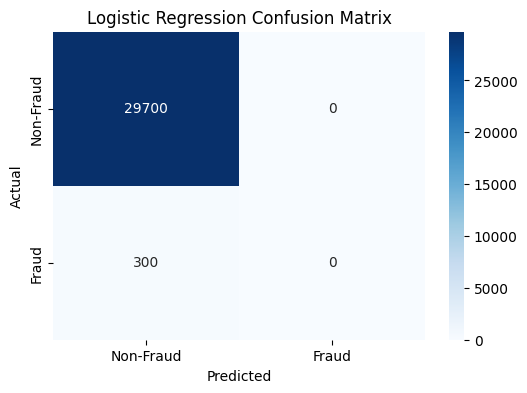


Decision Tree Accuracy: 0.9764

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     29700
           1       0.00      0.01      0.01       300

    accuracy                           0.98     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.98      0.98      0.98     30000



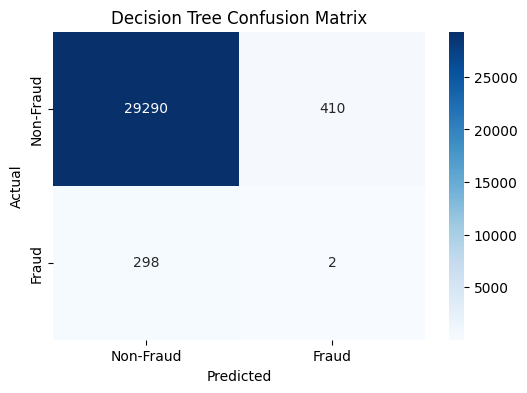

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Accuracy: 0.99

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.99     30000



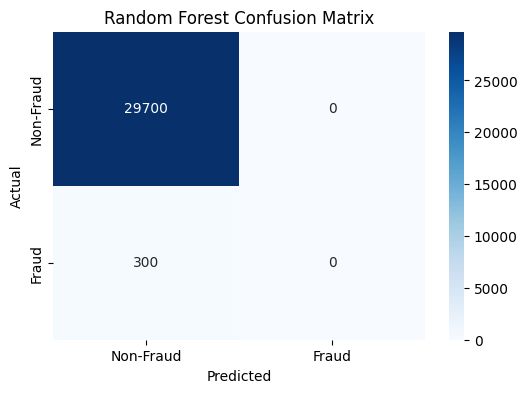


XGBoost Accuracy: 0.9899333333333333

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99     29700
           1       0.00      0.00      0.00       300

    accuracy                           0.99     30000
   macro avg       0.49      0.50      0.50     30000
weighted avg       0.98      0.99      0.98     30000



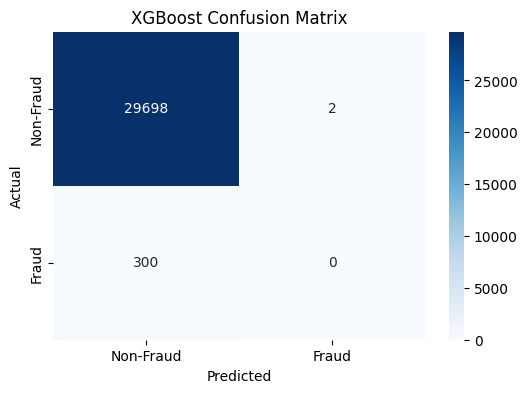

In [108]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Classification report
    clf_report = classification_report(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }

    # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

**6. 🔧 Model Optimization & Tuning**

After checking model performance, we improve the best model to make it more accurate and reliable.

**Key Action:**

* **Apply SMOTE (Synthetic Minority Over-sampling Technique):**
This helps fix the imbalance in the dataset by creating synthetic examples of the minority class (fraud cases). It gives the model a better chance to learn patterns related to fraud.



In [109]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   TransactionID         100000 non-null  int64  
 1   Amount                100000 non-null  float64
 2   MerchantID            100000 non-null  int64  
 3   TransactionType       100000 non-null  int64  
 4   Location              100000 non-null  int64  
 5   IsFraud               100000 non-null  int64  
 6   TransactionHour       100000 non-null  int32  
 7   TransactionDay        100000 non-null  int32  
 8   TransactionMonth      100000 non-null  int32  
 9   TransactionTypeLabel  100000 non-null  object 
 10  LocationLabel         100000 non-null  object 
dtypes: float64(1), int32(3), int64(5), object(2)
memory usage: 7.2+ MB


In [110]:
data = data.drop(['TransactionID', 'TransactionTypeLabel', 'LocationLabel'], axis=1)

In [111]:
X = data.drop('IsFraud', axis=1)
y = data['IsFraud']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [112]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

In [113]:
# Print the count before SMOTE
print("Before SMOTE:")
print(f"Train Data - Positive class (Fraud): {y_train.sum()} | Negative class (Non-Fraud): {(y_train == 0).sum()}")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")

Before SMOTE:
Train Data - Positive class (Fraud): 787 | Negative class (Non-Fraud): 79213
Test Data - Positive class (Fraud): 213 | Negative class (Non-Fraud): 19787


In [114]:
# Print the count after SMOTE
print("\nAfter SMOTE (Training Data):")
print(f"Train Data - Positive class (Fraud): {y_train_res.sum()} | Negative class (Non-Fraud): {(y_train_res == 0).sum()}")
print(f"Train Data Shape: {X_train_res.shape}")

print("\nTest Data (No Change):")
print(f"Test Data - Positive class (Fraud): {y_test.sum()} | Negative class (Non-Fraud): {(y_test == 0).sum()}")
print(f"Test Data Shape: {X_test.shape}")


After SMOTE (Training Data):
Train Data - Positive class (Fraud): 79213 | Negative class (Non-Fraud): 79213
Train Data Shape: (158426, 7)

Test Data (No Change):
Test Data - Positive class (Fraud): 213 | Negative class (Non-Fraud): 19787
Test Data Shape: (20000, 7)


In [115]:
for model_name, model in models.items():
    model.fit(X_train_res, y_train_res)
    models[model_name] = model

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:06:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Logistic Regression Accuracy: 0.5206

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.52      0.68     19787
           1       0.01      0.46      0.02       213

    accuracy                           0.52     20000
   macro avg       0.50      0.49      0.35     20000
weighted avg       0.98      0.52      0.68     20000



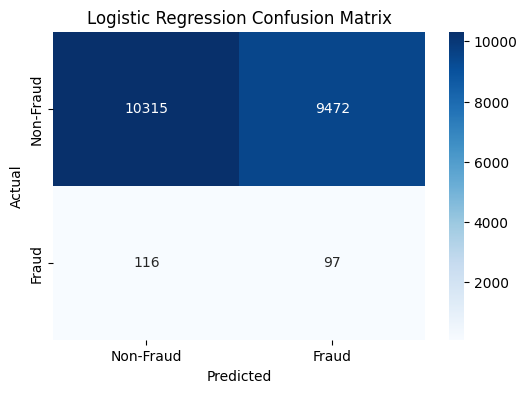


Decision Tree Accuracy: 0.92025

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96     19787
           1       0.01      0.06      0.02       213

    accuracy                           0.92     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.98      0.92      0.95     20000



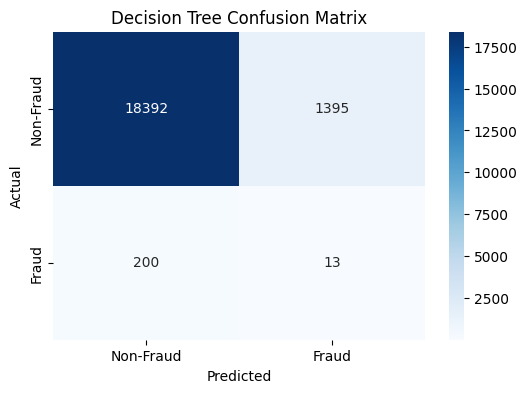


Random Forest Accuracy: 0.95345

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     19787
           1       0.01      0.04      0.02       213

    accuracy                           0.95     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.98      0.95      0.97     20000



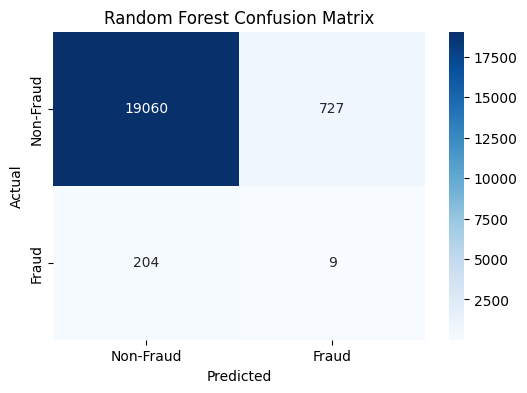


XGBoost Accuracy: 0.83595

XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.84      0.91     19787
           1       0.01      0.15      0.02       213

    accuracy                           0.84     20000
   macro avg       0.50      0.50      0.46     20000
weighted avg       0.98      0.84      0.90     20000



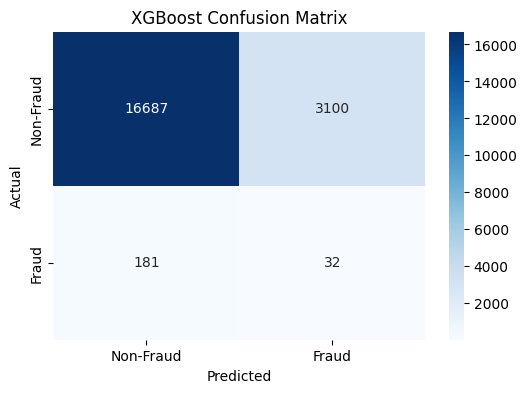

In [116]:
# Evaluation dictionary to store results
evaluation_results = {}

# Evaluasi setiap model
for model_name, model in models.items():
    y_pred = model.predict(X_test)

    # Hitung accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Classification report
    clf_report = classification_report(y_test, y_pred)

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Store results in dictionary
    evaluation_results[model_name] = {
        "accuracy": accuracy,
        "classification_report": clf_report,
        "confusion_matrix": conf_matrix
    }

    # Print evaluation for each model
    print(f"\n{model_name} Accuracy: {accuracy}")
    print(f"\n{model_name} Classification Report:\n", clf_report)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

Hyperparameters tuning for Random Forest with SMOTE

In [117]:
from sklearn.model_selection import RandomizedSearchCV

# Define the reduced parameter grid
param_dist = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Max depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt'],  # Number of features to consider at each split
    'bootstrap': [True, False]  # Whether to use bootstrap samples for building trees
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV with 5 iterations and 5-fold cross-validation
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=5,  # Number of random combinations to try
    cv=5,  # 5-fold cross-validation
    verbose=2,  # Print progress
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit the model on the resampled data
random_search.fit(X_train_res, y_train_res)

# Print the best parameters and score
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
15 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/utils/_

Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Score: 0.9685595071673939


Best Parameters: {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Best Score: 0.9685595071673939
Accuracy: 0.94875
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.97     19787
           1       0.01      0.04      0.02       213

    accuracy                           0.95     20000
   macro avg       0.50      0.50      0.49     20000
weighted avg       0.98      0.95      0.96     20000



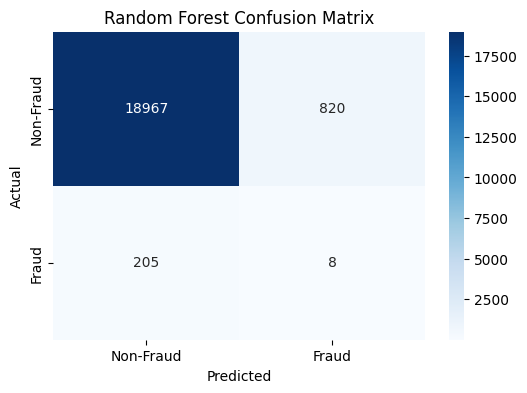

In [118]:
# Get the best model from the search
best_model = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation results
print(f"Best Parameters: {random_search.best_params_}")
print(f"Best Score: {random_search.best_score_}")
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{clf_report}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()